In [ ]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import pandas as pd
import cartopy.mpl.ticker as cticker
from matplotlib.animation import FuncAnimation
import imageio.v2 as imageio


: 

In [ ]:
land_mask = xr.open_dataset('/cluster/shared/noresm/inputdata/share/domains/domain.lnd.fv1.9x2.5_tnx1v4.170609.nc', decode_times=False)
mask = np.array(land_mask['mask'])
mask.plot()

: 

##Reading SSP4 and SSP5 landuse timeseries file


In [2]:
#file1 = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'     #SSP534
file1  = '/cluster/projects/nn9576k/anusha/DATA/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'           # file modifies with biocrops
dset1 = xr.open_dataset(file1, decode_times=False)
dset1 = dset1.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset1=dset1.assign_coords(Latitude=dset1['LATIXY'][:,0].values)
dset1=dset1.assign_coords(Longitude=dset1['LONGXY'][0,:].values)

file = '/cluster/projects/nn9576k/anusha/DATA/landuse.timeseries_1.9x2.5_SSP4-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'      #SSP434
dset = xr.open_dataset(file, decode_times=False)
dset = dset.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset=dset.assign_coords(Latitude=dset['LATIXY'][:,0].values)
dset=dset.assign_coords(Longitude=dset['LONGXY'][0,:].values)

a=dset['PCT_CFT'].sel(time=2015).sum(['Latitude','Longitude'])
nonzero_index = np.argwhere(a.values != 0)
#dset.time

In [17]:
#dset1['PCT_CFT'].sel(time=2015).plot()

In [ ]:
var = ['PCT_NAT_PFT','PCT_CFT', 'PCT_CROP']
var_area_SSP4 = (np.multiply((dset[var]/100), dset['AREA'])) # converting to area 
var_area_SSP5 = (np.multiply((dset1[var]/100), dset1['AREA'])) # converting to area 

Bareground=var_area_SSP4['PCT_NAT_PFT'].isel(natpft=0)
Forest=var_area_SSP4['PCT_NAT_PFT'].isel(natpft=slice(1,11)).sum(dim='natpft')
Grassland=var_area_SSP4['PCT_NAT_PFT'].isel(natpft=slice(12,14)).sum(dim='natpft')

Bareground_SSP534=var_area_SSP5['PCT_NAT_PFT'].isel(natpft=0)
Forest_SSP534=var_area_SSP5['PCT_NAT_PFT'].isel(natpft=slice(1,11)).sum(dim='natpft')
Grassland_SSP534=var_area_SSP5['PCT_NAT_PFT'].isel(natpft=slice(12,14)).sum(dim='natpft')

All_corn=var_area_SSP4['PCT_CFT'].sel(cft=dset.cft[[2, 3, 60, 61]]).sum(dim='cft')     #Corn_indices = [2, 3, 60, 61]
All_Soya=var_area_SSP4['PCT_CFT'].sel(cft=dset.cft[[8, 9, 62, 63]]).sum(dim='cft')     #Soy_indices= [8, 9, 62, 63]
Sugarcane=var_area_SSP4['PCT_CFT'].sel(cft=dset.cft[[52,53]]).sum(dim='cft')            #Sugarcane_indices= [52,53]
All_corn_SSP534=var_area_SSP5['PCT_CFT'].sel(cft=dset1.cft[[2, 3, 60, 61]]).sum(dim='cft')     #Corn_indices = [2, 3, 60, 61]
All_Soya_SSP534=var_area_SSP5['PCT_CFT'].sel(cft=dset1.cft[[8, 9, 62, 63]]).sum(dim='cft')     #Soy_indices= [8, 9, 62, 63]
Sugarcane_SSP534=var_area_SSP5['PCT_CFT'].sel(cft=dset1.cft[[52,53]]).sum(dim='cft')

##Time evolution of the global distribution of active crops from SSP534 and SSP434 - Percent used, not area

In [ ]:
All_corn=dset['PCT_CFT'].sel(cft=dset.cft[[2, 3, 60, 61]]).sum(dim='cft')     #Corn_indices = [2, 3, 60, 61]
All_Soya=dset['PCT_CFT'].sel(cft=dset.cft[[8, 9, 62, 63]]).sum(dim='cft')     #Soy_indices= [8, 9, 62, 63]
Sugarcane=dset['PCT_CFT'].sel(cft=dset.cft[[52,53]]).sum(dim='cft')            #Sugarcane_indices= [52,53]
All_corn_SSP534=dset1['PCT_CFT'].sel(cft=dset1.cft[[2, 3, 60, 61]]).sum(dim='cft')     #Corn_indices = [2, 3, 60, 61]
All_Soya_SSP534=dset1['PCT_CFT'].sel(cft=dset1.cft[[8, 9, 62, 63]]).sum(dim='cft')     #Soy_indices= [8, 9, 62, 63]
Sugarcane_SSP534=dset1['PCT_CFT'].sel(cft=dset1.cft[[52,53]]).sum(dim='cft')
#All_corn*=mask
#All_corn_SSP534*=mask
Sugarcane_SSP534*=mask
images = []
for year in range(2015, 2100):
    fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
    #(PFT_CFT_area/1e6).isel(cft=61).sel(time=year).plot(cmap='Greens',vmin=0.02,vmax=0.03) #million km2   # 61 for corn, 77 for soybean and 53 for sugracane
    All_corn_SSP534.sel(time=year).plot(cmap='Greens',vmin=0,vmax=100) #PCT
    axs.coastlines(linewidth=1)
    b=float(np.sum(np.multiply( All_corn_SSP534.sel(time=year),dset['AREA']))/(np.sum(dset['AREA'])))
    #print(b.__round__(3))
    plt.text(0.8, -0.3, b.__round__(3), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
    axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs.xaxis.set_major_formatter(lon_formatter)
    axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    plt.title(f'Corn_SSP534-{year}')
    plt.savefig(f'/cluster/projects/nn9576k/anusha/plots/SSP534/corn_{year}.png')
    images.append(plt.gcf())
    plt.close()
# Create an animation object
#imageio.mimsave('TropicalCorn_SSP534.gif', images, duration=0.5)


ValueError: The image must have at least two spatial dimensions.

In [ ]:
#All_corn*=mask
#fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
#All_corn.sel(time=2050).plot(cmap='Greens',vmin=0,vmax=100)
#axs.coastlines(linewidth=1)
# Create an animation object
#imageio.mimsave('/cluster/projects/nn9576k/anusha/plots/SSP534/TropicalCorn_SSP534.gif', images, duration=0.5)



ValueError: The image must have at least two spatial dimensions.

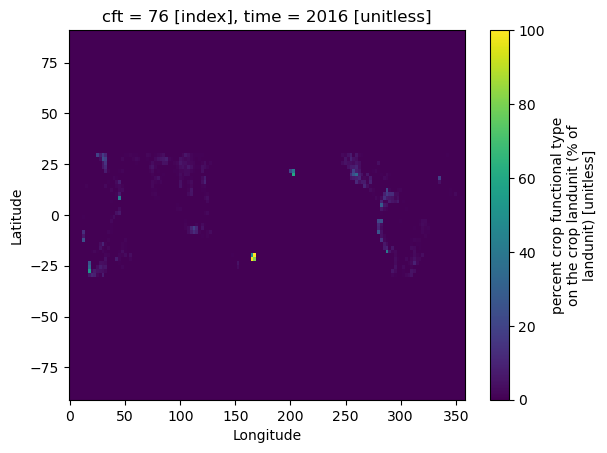

In [15]:
dset1['PCT_CFT'].sel(time=2016).isel(cft=61).plot()

In [34]:
dset1['PCT_CFT'].sel(time=2100)
a=dset1['PCT_CFT'].sel(time=2100).sum(['Latitude','Longitude'])
nonzero_index = np.argwhere(a.values != 0)
print(len(nonzero_index))

#dset1['PCT_CFT'][dict(cft=56)].loc[dict(time=year)] =  xr.where(diff > 0, diff,  dset1['PCT_CFT'][dict(cft=56)].loc[dict(time=year)])

#dset1['PCT_CFT'].isel(cft=56).sel(time=year)=(dset1['PCT_CROP'].sel(time=year))-(dset1['PCT_CROP'].sel(time=2015))  

53


In [5]:
file1  = '/cluster/projects/nn9576k/anusha/DATA/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'           # file modifies with biocrops
dset1 = xr.open_dataset(file1, decode_times=False)
surfdat_2000= '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr2000_c190304.nc'
dset_surf2000 = xr.open_dataset(surfdat_2000, decode_times=False)
diff = (dset1['PCT_CROP'].sel(time=2090))-(dset1['PCT_CROP'].sel(time=2015)) 
dset_surf2000['PCT_CFT'][dict(cft=56)]=  xr.where(diff > 0, diff,  dset_surf2000['PCT_CFT'][dict(cft=56)])

dset_surf2000.to_netcdf('/cluster/projects/nn9576k/anusha/DATA/surfdata_1.9x2.5_hist_78pfts_CMIP6_simyr2000_c230404.nc')


In [18]:
dset_surf2000['PCT_CROP'].equals(dset_surf2000['PCT_CFT'].sum('cft'))

False

##Write a new timeseries file with biocrops, by adding the addition of crops compared to 2015, for each year starting 2016 till 2100

In [12]:

for year in range(2016, 2020):
    diff = (dset1['PCT_CROP'].sel(time=year))-(dset1['PCT_CROP'].sel(time=2015)) 
    dset1['PCT_CFT'][dict(cft=56)].loc[dict(time=year)] =  xr.where(diff > 0, diff,  dset1['PCT_CFT'][dict(cft=56)].loc[dict(time=year)])
    dset1['PCT_CFT'][dict(cft=56)].loc[dict(time=year)].to_netcdf('/cluster/projects/nn9576k/anusha/DATA/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc', mode='a')
#diff


KeyError: "'time' is not a valid dimension or coordinate"

In [28]:
diff = (dset1['PCT_CROP'].sel(time=2016))-(dset1['PCT_CROP'].sel(time=2015)) 
diff.sum()
#diff.where(diff > 0).sum(dim=['Latitude', 'Longitude'])
#(dset1['PCT_CFT'].isel(cft=56).sel(time=2016)).sum(dim=['Latitude', 'Longitude'])
new_var

<xarray.DataArray 'PCT_CROP' ()>
array(258.17199525)

In [ ]:
target_index = 56
for year in range(2015, 2020):
    current_pct_crop = dset1['PCT_CROP'].sel(time=year)
    base_pct_crop = dset1['PCT_CROP'].sel(time=2015)
    new_pct_cft = current_pct_crop - base_pct_crop
    #dset1['PCT_CFT'].isel(cft=target_index).sel(time=year) = new_pct_cft
    dset1['PCT_CFT'].values[target_index, year-2015] = new_pct_cft
#result =xr.where(diff > 0, diff, new_CFT)
#((dset1['PCT_CROP'].sel(time=2016))-(dset1['PCT_CROP'].sel(time=2015))).sum()
#(dset1['PCT_CFT'].isel(cft=56).sel(time=2016)).sum()


IndexError: index 2016 is out of bounds for axis 1 with size 64

In [71]:
dset1['PCT_CFT'][target_index, year-2015]

<xarray.DataArray 'PCT_CFT' (Latitude: 96, Longitude: 144)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
    cft        int32 19
    time       int32 1906
  * Latitude   (Latitude) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * Longitude  (Longitude) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
Attributes:
    long_name:  percent crop functional type on the crop landunit (% of landu...
    units:      unitless

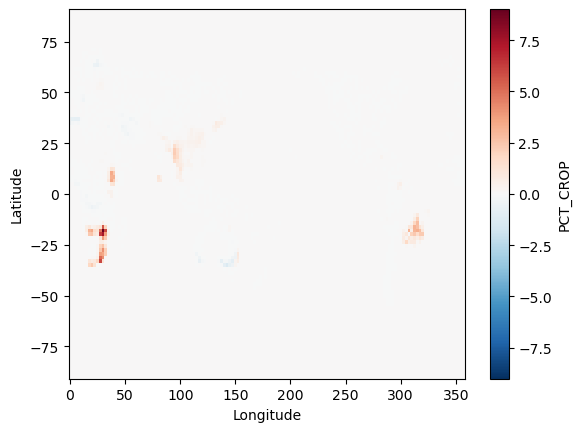

In [27]:
dset1['PCT_CFT'].sel(time=2015).sum()
diff=(dset1['PCT_CROP'].sel(time=2016))-(dset1['PCT_CROP'].sel(time=2015)) 
result.plot()

In [69]:
(dset1['PCT_CFT'].isel(cft=56).sel(time=2016)).values.sum()

0.0

NameError: name 'var_area_SSP5' is not defined

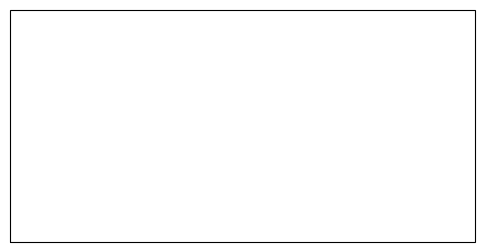

In [18]:
fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
#(((dset1['PCT_CROP'].sel(time=2100))-(dset1['PCT_CROP'].sel(time=2015)))/100).plot(cmap='rainbow',vmin=0.1,vmax=1)

(var_area_SSP5['PCT_CROP']/1e6).sel(time=2015).plot(cmap='coolwarm')#,vmin=0.1,vmax=1)       plot the 2015 map with areas in km2
#((((var_area_SSP5['PCT_CROP']).sel(time=2100))-(var_area_SSP5['PCT_CROP']).sel(time=2015))/1e6).plot(cmap='coolwarm')
b=float(np.sum(np.multiply(var_area_SSP5['PCT_CROP'],dset['AREA']))/(np.sum(dset['AREA'])))
axs.coastlines(linewidth=1)
axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)
axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
plt.title(f'Croparea increase 2100 wrt 2015 (million km2)')
b=var_area_SSP5['PCT_CROP'].sel(time=2015).sum()
c=var_area_SSP5['PCT_CROP'].sel(time=2100).sum()
print(b)
print(c-b)


##plot maps for each year that’s the addition of crops compared to 2015

In [ ]:
images = []
for year in range(2015, 2020):
    fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
    #(PFT_CFT_area/1e6).isel(cft=61).sel(time=year).plot(cmap='Greens',vmin=0.02,vmax=0.03) #million km2   # 61 for corn, 77 for soybean and 53 for sugracane
   
    ref_data = dset1['PCT_CFT'].sel(time=2015)
    new_data = ref_data.broadcast_like(dset1['PCT_CFT'].sel(time=year))
    dset1['PCT_CFT'].loc[dict(time=year)] = new_data
    dset1['PCT_CFT'].isel(cft=56).sel(time=year)=(dset1['PCT_CROP'].sel(time=year))-(dset1['PCT_CROP'].sel(time=2015))    


    PCT_CROPinc = ((dset1['PCT_CROP'].sel(time=year))-(dset1['PCT_CROP'].sel(time=2015)))
    PCT_CROPinc.plot(cmap='coolwarm', vmin=-10,vmax=10) #PCT_CROP INCREASE
    axs.coastlines(linewidth=1)
    b=float(np.sum(np.multiply(PCT_CROPinc,dset['AREA']))/(np.sum(dset['AREA'])))
    #print(b.__round__(3))
    plt.text(0.8, -0.3, b.__round__(3), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
    axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs.xaxis.set_major_formatter(lon_formatter)
    axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    plt.title(f'Croparea Increase in {year} wrt 2015')
 #   plt.savefig(f'/cluster/projects/nn9576k/anusha/plots/CropIncrease_{year}.png')
 #   images.append(plt.gcf())
 #   plt.close()


#image_files = [f'/cluster/projects/nn9576k/anusha/plots/CropIncrease_{year}.png' for year in range(2015, 2100)]

# Create a GIF from the image files
#with imageio.get_writer('/cluster/projects/nn9576k/anusha/plots/CropIncrease.gif', mode='I') as writer:
#    for filename in image_files:
#        image = imageio.imread(filename)
#        writer.append_data(image)

##Time series of Annual sum of crops

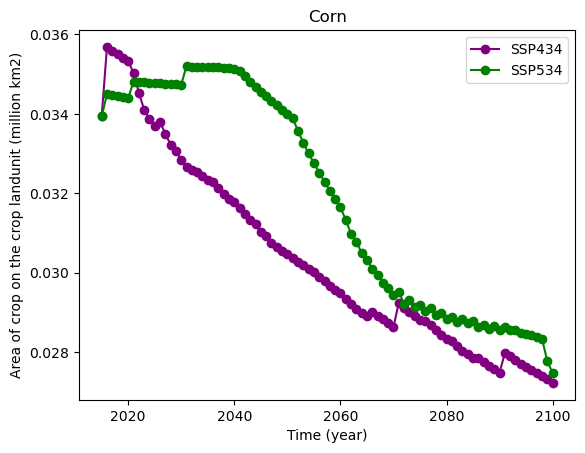

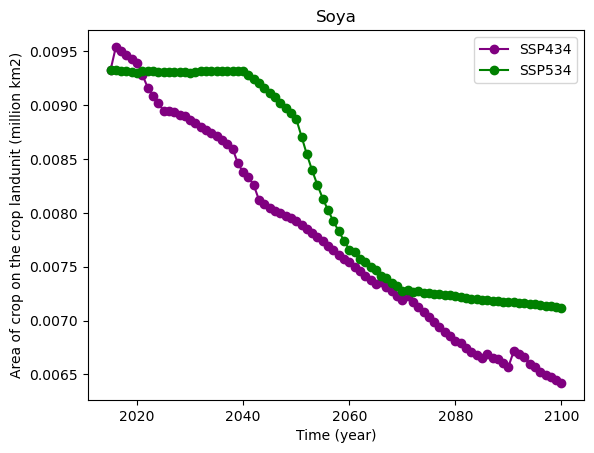

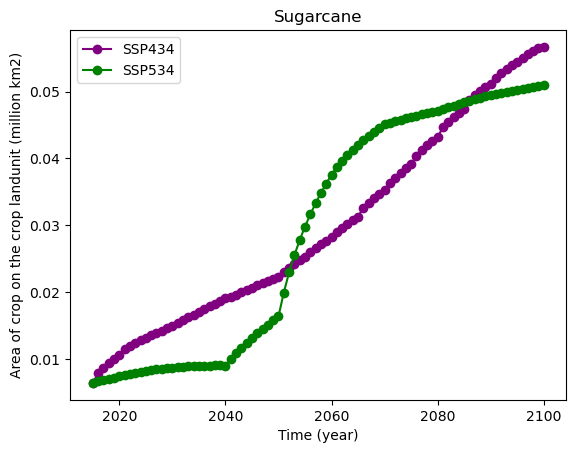

In [24]:
start_time = '2015'
end_time = '2100'
(All_corn/1e6).sum(['Latitude','Longitude']).sel(time=slice(start_time, end_time)).plot.line(color="purple", marker="o",label='SSP434')
(All_corn_SSP534/1e6).sum(['Latitude','Longitude']).sel(time=slice(start_time, end_time)).plot.line(color="green", marker="o",label='SSP534')
plt.title('Corn')
plt.ylabel('Area of crop on the crop landunit (million km2)')
plt.xlabel('Time (year)')
plt.legend()
plt.show()

(All_Soya/1e6).sum(['Latitude','Longitude']).sel(time=slice(start_time, end_time)).plot.line(color="purple", marker="o",label='SSP434')
(All_Soya_SSP534/1e6).sum(['Latitude','Longitude']).sel(time=slice(start_time, end_time)).plot.line(color="green", marker="o",label='SSP534')
plt.title('Soya')
plt.ylabel('Area of crop on the crop landunit (million km2)')
plt.xlabel('Time (year)')
plt.legend()
plt.show()

(Sugarcane/1e6).sum(['Latitude','Longitude']).sel(time=slice(start_time, end_time)).plot.line(color="purple", marker="o",label='SSP434')
(Sugarcane_SSP534/1e6).sum(['Latitude','Longitude']).sel(time=slice(start_time, end_time)).plot.line(color="green", marker="o",label='SSP534')
plt.title('Sugarcane')
plt.ylabel('Area of crop on the crop landunit (million km2)')
plt.xlabel('Time (year)')
plt.legend()
plt.show()


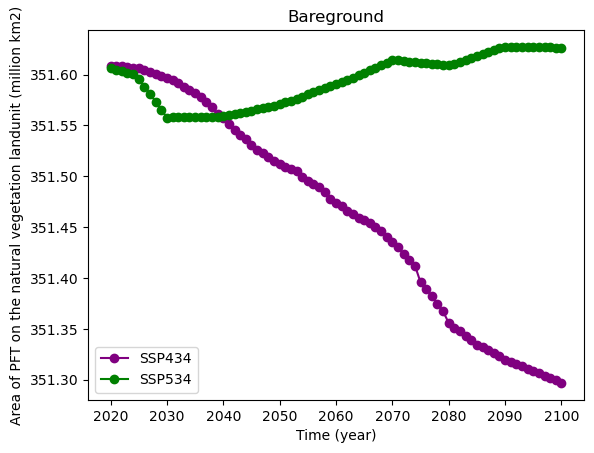

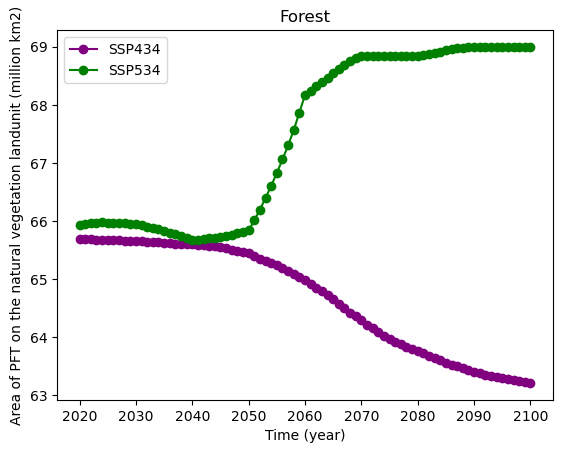

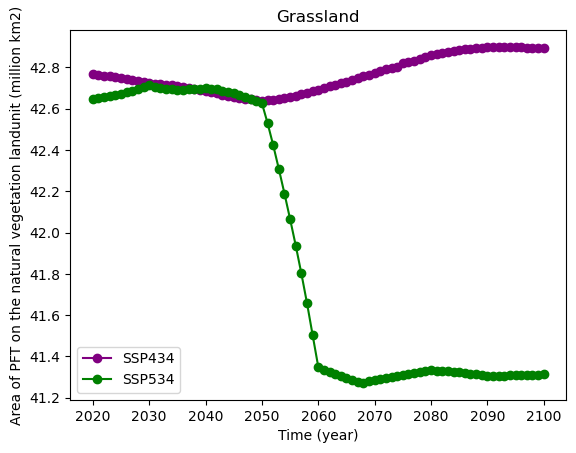

In [23]:
(Bareground/1e6).sum(['Latitude','Longitude']).sel(time=slice(start_time, end_time)).plot.line(color="purple", marker="o",label='SSP434')
(Bareground_SSP534/1e6).sum(['Latitude','Longitude']).sel(time=slice(start_time, end_time)).plot.line(color="green", marker="o",label='SSP534')
plt.title('Bareground')
plt.ylabel('Area of PFT on the natural vegetation landunit (million km2)')
plt.xlabel('Time (year)')
plt.legend()
plt.show()

(Forest/1e6).sum(['Latitude','Longitude']).sel(time=slice(start_time, end_time)).plot.line(color="purple", marker="o",label='SSP434')
(Forest_SSP534/1e6).sum(['Latitude','Longitude']).sel(time=slice(start_time, end_time)).plot.line(color="green", marker="o",label='SSP534')
plt.title('Forest')
plt.ylabel('Area of PFT on the natural vegetation landunit (million km2)')
plt.xlabel('Time (year)')
plt.legend()
plt.show()

(Grassland/1e6).sum(['Latitude','Longitude']).sel(time=slice(start_time, end_time)).plot.line(color="purple", marker="o",label='SSP434')
(Grassland_SSP534/1e6).sum(['Latitude','Longitude']).sel(time=slice(start_time, end_time)).plot.line(color="green", marker="o",label='SSP534')
plt.title('Grassland')
plt.ylabel('Area of PFT on the natural vegetation landunit (million km2)')
plt.xlabel('Time (year)')
plt.legend()
plt.show()

##making GIF images of the time evolution maps from SSP534

In [47]:
file1  = '/cluster/projects/nn9576k/anusha/DATA/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'           # file modifies with biocrops
dset = xr.open_dataset(file1, decode_times=False)
dset = dset.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset=dset.assign_coords(Latitude=dset['LATIXY'][:,0].values)
dset=dset.assign_coords(Longitude=dset['LONGXY'][0,:].values)
images = []
for year in range(2015, 2020):
    fig, axs = plt.subplots(figsize=(6,4), subplot_kw={'projection': ccrs.PlateCarree()})
    PFT_CFT_area = np.multiply((dset['PCT_CFT']/100), dset['AREA']) # converting to area fraction
    #(PFT_CFT_area/1e6).isel(cft=61).sel(time=year).plot(cmap='Greens',vmin=0.02,vmax=0.03) #million km2   # 61 for corn, 77 for soybean and 53 for sugracane
    
    All_corn=dset['PCT_CFT'].sel(cft=dset.cft[[2, 3, 60, 61]]).sum(dim='cft')     #Corn_indices = [2, 3, 60, 61]
    All_Soya=dset['PCT_CFT'].sel(cft=dset.cft[[8, 9, 62, 63]]).sum(dim='cft')     #Soy_indices= [8, 9, 62, 63]
    Sugarcane=dset['PCT_CFT'].sel(cft=dset.cft[[52,53]]).sum(dim='cft')#Sugarcane_indices= [52,53]
    All_corn*=mask
    #All_corn_tseries= All_corn.sum(['Latitude','Longitude'])

    All_corn.sel(time=year).plot(cmap='Greens',vmin=0,vmax=100) #PCT
    axs.coastlines(linewidth=1)
    b=float(np.sum(np.multiply(All_corn.sel(time=year),dset['AREA']))/(np.sum(dset['AREA'])))
    #print(b.__round__(3))
    plt.text(0.8, -0.3, b.__round__(3), fontsize=10, color='k', ha='center', va='top',transform=plt.gca().transAxes);
    axs.set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs.xaxis.set_major_formatter(lon_formatter)
    axs.set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    plt.title(f'SSP534-Corn-{year}')
    plt.savefig(f'/cluster/projects/nn9576k/anusha/plots/SSP534/corn_{year}.png')
    images.append(plt.gcf())
    
    plt.close()   

In [123]:
b=float(np.sum(np.multiply(All_corn.sel(time=year),dset['AREA']))/(np.sum(dset['AREA'])))
b.__round__(3)

3.468

In [46]:
image_files = [f'/cluster/projects/nn9576k/anusha/plots/SSP534/corn_{year}.png' for year in range(2015, 2100)]

# Create a GIF from the image files
with imageio.get_writer('/cluster/projects/nn9576k/anusha/plots/SSP434/Soya.gif', mode='I') as writer:
    for filename in image_files:
        image = imageio.imread(filename)
        writer.append_data(image)
writer.save('TropicalCorn_SSP534.gif') 
#imageio.mimsave('TropicalCorn_SSP534.gif', images, duration=0.5)

In [57]:
file = '/cluster/shared/noresm/inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/landuse.timeseries_1.9x2.5_SSP5-3.4_78pfts_CMIP6_simyr1850-2100_c190228.nc'     #SSP534
dset = xr.open_dataset(file, decode_times=False)
dset = dset.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset=dset.assign_coords(Latitude=dset['LATIXY'][:,0].values)
dset=dset.assign_coords(Longitude=dset['LONGXY'][0,:].values)
dset1['time'] = dset.time
a=dset['PCT_CFT'].sel(time=2015).sum(['Latitude','Longitude'])
dset

<xarray.Dataset>
Dimensions:                  (natpft: 15, cft: 64, Latitude: 96,
                              Longitude: 144, time: 251)
Coordinates:
  * natpft                   (natpft) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14
  * cft                      (cft) int32 15 16 17 18 19 20 ... 73 74 75 76 77 78
  * time                     (time) int32 1850 1851 1852 1853 ... 2098 2099 2100
  * Latitude                 (Latitude) float64 -90.0 -88.11 ... 88.11 90.0
  * Longitude                (Longitude) float64 0.0 2.5 5.0 ... 355.0 357.5
Data variables: (12/22)
    LANDFRAC_PFT             (Latitude, Longitude) float64 ...
    PFTDATA_MASK             (Latitude, Longitude) int32 ...
    PCT_CROP                 (time, Latitude, Longitude) float64 ...
    PCT_CROP_MAX             (Latitude, Longitude) float64 ...
    PCT_NAT_PFT              (time, natpft, Latitude, Longitude) float64 ...
    PCT_NAT_PFT_MAX          (natpft, Latitude, Longitude) float64 ...
    ...                       ...
    HARVEST_SH2              (time, Latitude, Longitude) float64 ...
    HARVEST_SH3              (time, Latitude, Longitude) float64 ...
    GRAZING                  (time, Latitude, Longitude) float64 ...
    FERTNITRO_CFT            (time, cft, Latitude, Longitude) float64 ...
    UNREPRESENTED_PFT_LULCC  (time, natpft, Latitude, Longitude) float64 ...
    UNREPRESENTED_CFT_LULCC  (time, cft, Latitude, Longitude) float64 ...
Attributes: (12/41)
    Conventions:                          NCAR-CSM
    History_Log:                          created on: 02-28-19 14:03:18
    Logname:                              erik
    Host:                                 cheyenne3
    Source:                               Community Land Model: CLM5
    Version:                              release-clm5.0.18/gpfs/fs1/scratch/...
    ...                                   ...
    map_agfirepkmon_file:                 map_0.5x0.5_lanwat_to_1.9x2.5_aave_...
    map_gdp_file:                         map_0.5x0.5_lanwat_to_1.9x2.5_aave_...
    map_peatland_file:                    map_0.5x0.5_lanwat_to_1.9x2.5_aave_...
    map_soildepth_file:                   map_5x5min_ORNL-Soil_to_1.9x2.5_nom...
    map_topography_stats_file:            map_1km-merge-10min_HYDRO1K-merge-n...
    Vegetation_type_raw_data_filename:    mksrf_landuse_histclm50_LUH2_1850.c...

In [61]:
file1 = '/cluster/projects/nn9576k/anusha/DATA/landuse.timeseries_0.9x1.25_SSP4-3.4_78pfts_CMIP6_simyr1850-2100_c190102.nc'      #SSP434
dset1 = xr.open_dataset(file1, decode_times=False)
dset1 = dset1.rename_dims({'lsmlat': 'Latitude', 'lsmlon': 'Longitude'})
dset1=dset1.assign_coords(Latitude=dset1['LATIXY'][:,0].values)
dset1=dset1.assign_coords(Longitude=dset1['LONGXY'][0,:].values)
dset1['time'] = dset.time
a=dset1['PCT_CFT'].sel(time=2015).sum(['Latitude','Longitude'])
#a=dset1['PCT_CFT'].sel(time=2015)


In [53]:

dset.time.equals(dset1.time)

True